In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

Reading wave file

In [ ]:
wave_file = "/content/drive/MyDrive/dataset1/f0001_us_f0001_00001.wav"

In [ ]:
signal,sample_rate = librosa.load(wave_file)

In [ ]:
signal

array([-3.6334711e-07,  1.1449176e-06, -8.5497084e-07, ...,
       -1.9632492e-04, -1.2246879e-04, -3.0416921e-05], dtype=float32)

In [ ]:
sample_rate

22050

Plotting

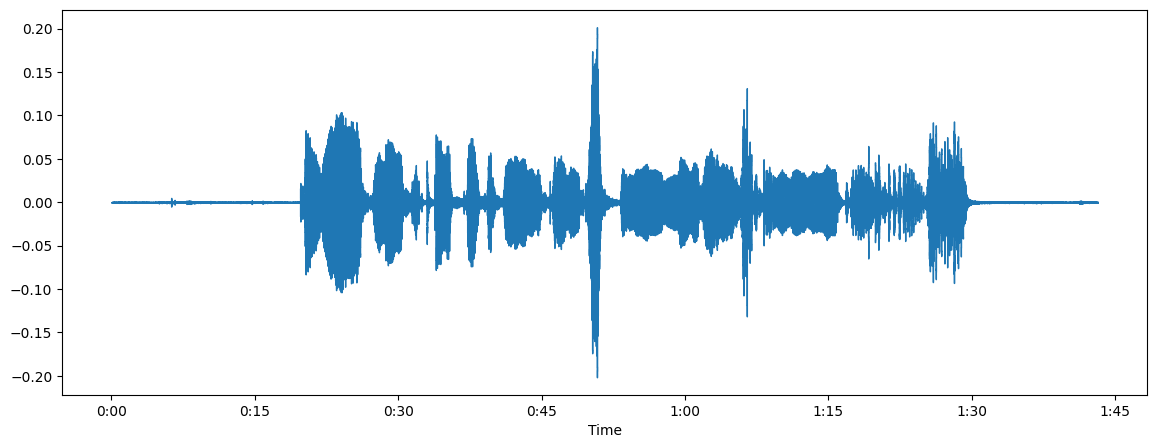

In [ ]:
plt.figure(figsize = (14, 5))
librosa.display.waveshow(signal, sr = 1000)

Reading Multiple wave files from folder

In [ ]:
myfolder = "/content/drive/MyDrive/dataset1"
myfolder


In [ ]:
def getwavefile(path):
  wave_files = glob.glob(path + "/*.wav")
  plt.figure(figsize = (14, 5))
  for i  in wave_files:
    signal,sample_rate = librosa.load(i)
    librosa.display.waveshow(signal, sr = 1000)

In [ ]:
getwavefile(myfolder)

DataFrame

In [ ]:
import pandas as pd
import glob

In [ ]:
myfolder = "/content/drive/MyDrive/dataset1"

In [ ]:
def getwavfile(path):
  wave_file = glob.glob(path +"/*.wav")
  return wave_file

In [ ]:
data = getwavfile(myfolder)

In [ ]:
data

In [ ]:
wave_file = glob.glob(myfolder +"/*.wav")
names=[]
label_list=[]
for h in wave_file:
  k=h.split("1/")
  names.append(k[1])
  print(k[1][0])
  if k[1][0]=='f':
    label_list.append("Female")
  else:
    label_list.append("male")

In [ ]:
names

In [ ]:
label_list

In [ ]:
df1 = pd.DataFrame(names, columns = ["names"])
df1

In [ ]:
df2 = pd.DataFrame(label_list, columns = ["label_list"])
df2

In [ ]:
df3 = pd.DataFrame(data, columns = ["wave_file"])
df3

In [ ]:
df=pd.concat([df1,df2,df3],axis=1)
df

feature extraction:

In [ ]:
df5 = pd.DataFrame(signal, columns = ['Signals'])
df5

Feature Extraction:

In [ ]:
import scipy
_path = "/content/drive/MyDrive/dataset1"

In [ ]:
meanlist=[]
stdlist=[]
maxvlist=[]
type_list= []
n_list= []

In [ ]:
wavefiles=glob.glob(_path+"/*.wav")
# print(wavefiles)

meanlist=[]

stdlist=[]
maxvlist=[]
type_list= []
n_list= []
minvlist = []
medianlist =[]
modelist = []
skew_list=[]
kurt_list=[]
q1_list =[]
q3_list=[]
iqr_list = []

n_list = []
j_list = []
s_list = []
h_list = []

for wav_file in  wavefiles :
  sound = parselmouth.Sound(wav_file) # sound object from wav file
  pitch = sound.to_pitch()
  pulses = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

        # name analysis
  name = os.path.basename(wav_file).split(".")[0]

       # jitter
  jitter_local = parselmouth.praat.call(pulses, "Get jitter (local)", 0.0, 0.0, 0.0001, 0.02, 1.3) * 100

        # shimmer
  shimmer_local = parselmouth.praat.call([sound, pulses], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)

        # HNR
  harmonicity = parselmouth.praat.call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
  hnr = parselmouth.praat.call(harmonicity, "Get mean", 0, 0)

        # Append to numpy array
  n_list.append(name)
  j_list.append(jitter_local)
  s_list.append(shimmer_local)
  h_list.append(hnr)

  if jitter_local >2.10:
    type_list.append("1")
  else:
    type_list.append("0")

  x, sr = librosa.load(wav_file)
  freqs = np.fft.fftfreq(x.size)






  mean = 0
  std = 0
  maxv = 0
  minv = 0
  median = 0
  mode = 0
  skew = 0
  kurt = 0
  q1 = 0
  q3 = 0
  iqr = 0


  mean = np.mean(freqs)
  std = np.std(freqs)
  maxv = np.amax(freqs)
  minv = np.amin(freqs)
  median = np.median(freqs)
  mode = scipy.stats.mode(freqs)[0][0]
  skew = scipy.stats.skew(freqs)
  kurt = scipy.stats.kurtosis(freqs)
  q1 = np.quantile(freqs, 0.25)
  q3 = np.quantile(freqs, 0.75)
  iqr = scipy.stats.iqr(freqs)

  meanlist.append(mean)
  stdlist.append(std)
  maxvlist.append(maxv)
  minvlist.append(minv)
  medianlist.append(median)
  modelist.append(mode)
  skew_list.append(skew)
  kurt_list.append(kurt)
  q1_list.append(q1)
  q3_list.append(q3)

  iqr_list.append(iqr)




In [ ]:
import pandas as pd
def get_voice_data(_path):




  return meanlist,stdlist,maxvlist,minvlist,medianlist, modelist, skew_list, kurt_list,q1_list,iqr_list,n_list,j_list, s_list, h_list


In [ ]:
meanlist,stdlist,maxvlist,minvlist,medianlist,modelist, skew_list, kurt_list,q1_list,iqr_list,n_list,j_list, s_list, h_list   = get_voice_data(_path)

In [ ]:
cols=["meanlist","stdlist","maxvlist","minvlist","medianlist","modelist", "skew_list", "kurt_list","q1_list","iqr_list", "n_list","j_list", "s_list", "h_list" ]

In [ ]:
mean=pd.DataFrame(meanlist, columns = ['Mean'])
std=pd.DataFrame(stdlist, columns = ['Std'])
max=pd.DataFrame(maxvlist, columns = ['Max'])
min=pd.DataFrame(minvlist, columns = ['Min'])
median=pd.DataFrame(medianlist, columns = ['Median'])
mode_ = pd.DataFrame(modelist, columns = ['Mode'])
skew_ = pd.DataFrame(skew_list, columns = ['Skew'])
kurt_ = pd.DataFrame(kurt_list, columns = ['Kurt'])
q1_ = pd.DataFrame(q1_list, columns = ['Q1'])
iqr_ = pd.DataFrame(iqr_list, columns = ['IQR'])
nlist = pd.DataFrame(n_list, columns = ['Name'])
jlist = pd.DataFrame(j_list, columns = ['Jitter'])
slist = pd.DataFrame(s_list, columns = ['Shimmer'])
hlist = pd.DataFrame(h_list, columns = ['HNR'])


Feature = pd.concat([mean, std,max,min,median, mode_,skew_,kurt_, q1_,iqr_, jlist,slist,hlist,df2], axis = 1)

In [ ]:
df2

,label_list
0,male
1,male
2,male
3,male
4,male
...,...
3837,Female
3838,Female
3839,Female
3840,Female


In [ ]:
for column in df2.columns:
    plt.hist(df2[column])
    plt.show()

In [ ]:
Feature

,Mean,Std,Max,Min,Median,Mode,Skew,Kurt,Q1,IQR,Jitter,Shimmer,HNR,label_list
0,-0.000003,0.288675,0.499994,-0.5,-0.000003,-0.5,2.416339e-16,-1.2,-0.250002,0.499997,2.471537,0.064400,11.022212,male
1,-0.000004,0.288675,0.499993,-0.5,-0.000004,-0.5,-1.040949e-16,-1.2,-0.250002,0.499996,4.480286,0.122847,7.533027,male
2,-0.000004,0.288675,0.499993,-0.5,-0.000004,-0.5,-3.812887e-16,-1.2,-0.250002,0.499996,3.493485,0.126583,8.316258,male
3,-0.000004,0.288675,0.499992,-0.5,-0.000004,-0.5,-1.631878e-16,-1.2,-0.250002,0.499996,2.578264,0.082210,9.991584,male
4,-0.000003,0.288675,0.499994,-0.5,-0.000003,-0.5,4.024573e-16,-1.2,-0.250002,0.499997,2.965374,0.092473,9.473039,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,-0.000004,0.288675,0.499991,-0.5,-0.000004,-0.5,-1.245332e-16,-1.2,-0.250002,0.499996,2.189804,0.080380,12.870292,Female
3838,-0.000003,0.288675,0.499993,-0.5,-0.000003,-0.5,2.015410e-16,-1.2,-0.250002,0.499997,2.355520,0.094172,11.647812,Female
3839,-0.000007,0.288675,0.499986,-0.5,-0.000007,-0.5,-8.628742e-17,-1.2,-0.250004,0.499993,3.358485,0.101566,12.049368,Female
3840,-0.000005,0.288675,0.499989,-0.5,-0.000005,-0.5,2.027369e-16,-1.2,-0.250003,0.499995,2.856145,0.099374,12.782549,Female


DataFrame to CSV file

In [ ]:
csv_data = Feature.to_csv(header = True)
Feature.to_csv("/content/drive/MyDrive/feature.csv")

In [ ]:
csvFile = pd.read_csv('/content/drive/MyDrive/feature.csv')
metadata=pd.DataFrame(csvFile)

In [ ]:
df2

In [ ]:
pip install praat-parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 75.9 MB/s eta 0:00:00


In [ ]:
import glob
import parselmouth
import scipy
import os
from sklearn.model_selection import train_test_split

Model Building

In [ ]:
X = Feature.iloc[:,:-1]
y = Feature.label_list

In [ ]:
X

In [ ]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [ ]:
X_train.shape

In [ ]:
x_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
wave_file = glob.glob(myfolder +"/*.wav")


Using SVM

In [ ]:
def score(model):
    print("Training score: ",model.score(X_train,y_train))
    print("Test score: ",model.score(x_test,y_test))

In [ ]:
from sklearn.svm import SVC

SVMmodel = SVC(kernel = 'rbf', C=2.0,random_state=0,degree = 3)
SVMmodel.fit(X_train,y_train)
ypred3 = SVMmodel.predict(x_test)
score(SVMmodel)

Training score:  0.6700292873413602
Test score:  0.647594278283485


Using Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTmodel = DecisionTreeClassifier(min_samples_split = 5,max_depth = 10,random_state = 0)

In [ ]:
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=0)

In [ ]:
ypred1 = DTmodel.predict(x_test)
ypred1[:5]

array(['male', 'male', 'Female', 'Female', 'Female'], dtype=object)

In [ ]:
score(DTmodel)

Training score:  0.856492027334852
Test score:  0.6983094928478544


In [ ]:
# eval(ypred1,y_test)

 LogisticRegression¶

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LRmodel = LogisticRegression(n_jobs=3,max_iter=1000,random_state=0)

In [ ]:
LRmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000, n_jobs=3, random_state=0)

In [ ]:
ypred2 = LRmodel.predict(x_test)

In [ ]:
score(LRmodel)

Training score:  0.6706801171493655
Test score:  0.6527958387516255


In [ ]:
# eval(ypred2,y_test)

Using  K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Kmodel = KNeighborsClassifier(n_neighbors = 50,metric ='minkowski',p=1,n_jobs=5,algorithm='ball_tree')

In [ ]:
Kmodel.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_jobs=5, n_neighbors=50, p=1)

In [ ]:
ypred4 = Kmodel.predict(x_test)

In [ ]:
score(Kmodel)

Precision and recall

In [ ]:

from sklearn .metrics import accuracy_score
print(accuracy_score(y_test, ypred3))

0.647594278283485


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import metrics
print( metrics.classification_report(y_test, ypred3))

              precision    recall  f1-score   support

      Female       0.65      0.80      0.71       425
        male       0.65      0.47      0.54       344

    accuracy                           0.65       769
   macro avg       0.65      0.63      0.63       769
weighted avg       0.65      0.65      0.64       769

